In [1]:
import os
file_list = list(filter(lambda x : "pickle" in x, os.listdir(str(os.getcwd()))))
file_list = list(filter(lambda x : "_text" in x, file_list))
file_list

['(투썸 OR 투썸플레이스)_text.pickle',
 '(스타벅스 OR 스벅)_text.pickle',
 '엔젤리너스_text.pickle',
 '이디야_text.pickle',
 '(탐앤탐스 OR 탐탐)_text.pickle']

In [2]:
import pandas as pd
ProjDic = pd.read_csv("(R)Project Dictionary(표준형).csv", encoding = "cp949")

for iteration in range(len(file_list)):
    import pickle
    with open(file_list[iteration],"rb") as fr:
        df = pickle.load(fr)

        
       
    
    
    def Delete_Overlapped_Messages(df, number_of_overlapped):
        import pandas as pd
        from tqdm import tqdm_notebook as bar

        #csv_path = "DOM_ex.csv"    #< -- 간단한 예시용 D.F. 및 다른 별표도 다 예시용
        #output_path = "(O)DOM_ex.csv"
        #csv_path = "1.Jlab_miner 네이버 카페 크롤링/2. 검색창 크롤링/패스트패션/자라/Crawled_Data_Short자라(2015.01.01_2019.09.20).csv"
        #output_path = "(O-"+str(number_of_overlapped)+")Crawled_Data_Short자라(2015.01.01_2019.09.20).csv"
        df = df
        df_sorted = df.sort_values(by="contents").reset_index(drop=True)
        iterations = len(df_sorted)
        row_num = 0
        deleted_messages = 0

        total = bar(range(iterations-1), desc = "deleting")
        for i in total:
            step = i+1
            standard_row = df_sorted.get_value(row_num, "contents")
            under_row = df_sorted.get_value(row_num+1, "contents")
            if len(str(standard_row)) < number_of_overlapped:
                standard_row_words = standard_row
            else :
                standard_row_words = str(standard_row)[:number_of_overlapped]
            if len(str(under_row)) < number_of_overlapped:
                under_row_words = under_row
            else :
                under_row_words = str(under_row)[:number_of_overlapped]
            #print("step"+str(i+1))
            #print(standard_row_words)
            #print(under_row_words)

            if standard_row_words == under_row_words:
                df_sorted = df_sorted.drop(row_num+1,0).reset_index(drop=True)
                row_num = row_num
                deleted_messages = deleted_messages + 1
                #print("drop df"+"\n")
            else :
                df_sorted = df_sorted
                row_num = row_num+1
                #print("do not  drop"+"\n")
            if step == (iterations-1):
                break
        output_df = df_sorted.sort_values(by="date").reset_index(drop=True)
        display(output_df.head())
        print(str(deleted_messages)+" messages are deleted.")

        return output_df
        #output_df.to_csv(output_path, encoding = "cp949", index=False)
    
    
    
    
    
    
    DOM = Delete_Overlapped_Messages(df, 15)
    with open("(RM)"+file_list[iteration].split("_")[0]+".pickle","wb") as fw:
        pickle.dump(DOM, fw)
    
    
    
    
    
    
    def Frequency_Analysis(data):
        import nltk
        import pandas as pd
        import os
        from collections import Counter
        import re

        def get_contents(item):
            if item != "":
                for tem in str(item).split(" "):
                    if (".com" in tem) or ("http" in tem):
                        item = item.replace(tem,"")
                not_language = re.compile('[^ ㄱ-ㅎㅣ가-힣|a-z|A-Z|0-9]+')
                item = re.sub(not_language,"",str(item))
                item = item.lower()
                contents.append(item.strip())

        GMF1 = 10
        GMF2 = 5
        Frequency_Gap = 0.1
        df = data
        #df = pd.read_csv(path+"_"+str(i)+".csv", encoding = "cp949")

        contents = []
        tag_contents = []
        df.contents.apply(get_contents)

        for token in contents:
            for word in str(token).split(" "):
                if len(str(word)) > 1:
                    tag_contents.append(word)
        counted_contents = Counter(tag_contents)

        tag_count = []

        for n,c in counted_contents.most_common():
            dics = {"tag":n,"count":c}
            tag_count.append(dics)
            #if dics["count"]>=10:                  #GMF1적용하기
                #tag_count.append(dics)
        #df_tag_count = pd.DataFrame(tag_count)
        df_tag_count = pd.DataFrame(tag_count)
        #df_tag_count.to_csv(path+"_"+str(i)+"_frequency.csv", encoding = "cp949",index=False)
        from tqdm import tqdm_notebook as bar
        df_reset = df_tag_count.reset_index(drop=True)
        #display(df_reset.head(10))
        iterations = len(df_reset)
        row_num = 0

        total = bar(range(iterations-1), desc = "comparing...")
        for t in total:
            step = t+1
            std_tag = str(df_reset.iloc[row_num].to_dict()["tag"])
            std_count = df_reset.iloc[row_num].to_dict()["count"]
            comparison_tag = str(df_reset.shift(-1).iloc[row_num].to_dict()["tag"])
            comparison_count = df_reset.shift(-1).iloc[row_num].to_dict()["count"]

            if std_tag == comparison_tag[:len(std_tag)]:
                frequency_gap = abs(std_count - comparison_count)
                if frequency_gap/std_count < Frequency_Gap:
                    df_reset.loc[df_reset["tag"]==comparison_tag, "count"] = comparison_count + std_count
                    index = df_reset[df_reset["tag"]==std_tag].index[0]
                    df_reset = df_reset.drop(index).reset_index(drop=True)

                else:
                    row_num = row_num+1
                    continue
            else:
                row_num = row_num+1
                continue
            if step == iterations - 1:
                break

        df_reset = df_reset[df_reset["count"]>=GMF2]
        #df_reset.to_csv("(freq)TripAdvisor_가오슝(Mac).csv", encoding = "cp949",index=False)
        #df_reset.to_csv("(freq)TripAdvisor_가오슝(Window).csv", encoding = "utf-8",index=False)
        
    
        def Lemmatize_Frequency(Dic=ProjDic, Frequency_output = df_reset):
            Rep_list = list(set(list(Dic.loc[Dic["Replace_Texts"]!="","Replace_Texts"].to_dict().values())))
            for standard_word in Rep_list:
                word_list = list(set(list(Dic.loc[Dic["Replace_Texts"]==standard_word, "tag"].to_dict().values())))
                for word in word_list:
                    if word in list(Frequency_output.tag):
                        if standard_word in list(Frequency_output.tag):
                            replace_count = int(list(Frequency_output.loc[Frequency_output["tag"] == word, "count"])[0])
                            cum_count = int(list(Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"])[0])
                            Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"] = replace_count + cum_count
                            Frequency_output = Frequency_output.loc[Frequency_output["tag"] != word]
                        else:
                            Frequency_output.loc[Frequency_output["tag"] == word, "tag"] = standard_word
                    else: continue

            return Frequency_output.sort_values(by = "count", ascending = False)

        df_tag_count = Lemmatize_Frequency()
        return df_tag_count
    
    freq = Frequency_Analysis(DOM)
    with open("(freq)"+file_list[iteration].split("_")[0]+".pickle","wb") as fw:
        pickle.dump(freq, fw)


        
    import pandas as pd
    ProjDic = pd.read_csv("(R)Project Dictionary(표준형).csv", encoding = "cp949").iloc[5:].fillna(int(0))
    #display(ProjDic)
    def row_remover(item):
        values_df = ProjDic[ProjDic["tag"]==item]
        for i in range(len(values_df)):
            if list(values_df.iloc[i][2:24]) == [0]*22:
                ProjDic.drop(values_df.index[i], inplace = True)

        return ProjDic
    ProjDic.tag.apply(row_remover)
    #display (ProjDic)
    print("df row_remover applied")
    function = (lambda x: "" if x == 0 else x)
    ProjDic = ProjDic.applymap(function)
    ProjDic=ProjDic[~ProjDic["tag"].duplicated()]
    #display(ProjDic)    
        
    
    
    def Replace_Texts_in_Dictionary(Project_dic, Frequency_output):
        Rep_list = list(set(list(Project_dic.loc[Project_dic["Replace_Texts"]!="","Replace_Texts"].to_dict().values())))
        for standard_word in Rep_list:
            word_list = list(set(list(Project_dic.loc[Project_dic["Replace_Texts"]==standard_word, "tag"].to_dict().values())))
            for word in word_list:
                if word in list(Frequency_output.tag):
                    if standard_word in list(Frequency_output.tag):
                        replace_count = int(list(Frequency_output.loc[Frequency_output["tag"] == word, "count"])[0])
                        cum_count = int(list(Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"])[0])
                        Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"] = replace_count + cum_count
                        Frequency_output = Frequency_output.loc[Frequency_output["tag"] != word]
                    else:
                        Frequency_output.loc[Frequency_output["tag"] == word, "tag"] = standard_word
                else: continue

        return Frequency_output.sort_values(by = "count", ascending = False)

        
    Replaced_Freq = Replace_Texts_in_Dictionary(ProjDic, freq)
    
    
    
    
    stopwords = ["rt","gt","","오늘","어제","내일","진짜", "와서",
            "ㅋㅋㅋㅋㅋ", "ㅋㅋ","ㅋㅋㅋ", "좋다", "너무", "그냥", "정말",
            "역시", "계속", "바로", "있다", "in","1분께", "플레이스"] 
    asd = Replaced_Freq["tag"].isin(stopwords)
    asdasd = Replaced_Freq[~asd]
    
    
    
    
    def Categorize_Words_With_Dic(Project_dic, Replaced_Freqency):
        category_columns = Project_dic.columns[2:]
        Expanded_Frequency = pd.concat([Replaced_Freqency, pd.DataFrame(columns = category_columns)],axis = 1, sort=True)
        def copy_category_info(item):
            if item in list(Project_dic.tag):
                new_info = list(Project_dic.loc[Project_dic["tag"]==item, category_columns].to_dict().values())
                new_info = list(map(lambda x: list(x.values())[0] , new_info))
                new_info = list(Expanded_Frequency.loc[Expanded_Frequency["tag"]==item, "tag"]) + list(Expanded_Frequency.loc[Expanded_Frequency["tag"]==item, "count"]) + new_info
                Expanded_Frequency.loc[Expanded_Frequency.loc[Expanded_Frequency["tag"] == item].index] = new_info
            else:
                new_info = list(Expanded_Frequency.loc[Expanded_Frequency["tag"]==item, "tag"]) + list(Expanded_Frequency.loc[Expanded_Frequency["tag"]==item, "count"]) + [""]*len(category_columns)

        Expanded_Frequency.tag.apply(copy_category_info)

        return Expanded_Frequency.sort_values(by = "count", ascending = False)

    Exp_Dic = Categorize_Words_With_Dic(ProjDic, asdasd)
    Exp_Dic.to_csv(file_list[iteration].split("_")[0]+"_Dic.csv", encoding = "cp949", index = False)
        
    

/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,contents,date
0,애기랑 투썸 ! @happy_we714,2018-03-01
1,투썸에서 대기타면서 테니 생일 광고 봤옹 ㅠㅠㅠㅠㅠㅠㅠ,2018-03-01
2,잘먹었다 역시 점심은 투썸,2018-03-01
3,이거 먹는 내내 투썸케잌 생각났다. 제발 투썸케잌 한번만 먹어보고싶다.,2018-03-01
4,[Blog][강원도 춘천] 춘천 야경 뷰포인트 - 투썸플레이스 구봉산 점 http:...,2018-03-01


85 messages are deleted.



/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/ssakoon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


df row_remover applied


/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,contents,date
0,스벅에 놔둔거 아냐?,2018-03-01
1,"스타벅스, 위대한 기업을 알아간다는 것은... http://slownote.kr/2...",2018-03-01
2,"스타벅스 슐츠 회장이 폭스비즈니스 인터뷰에서 ""블록체인은 스타벅스 통합앱이 나아갈 ...",2018-03-01
3,"태블릿pc부터 상품권, 스타벅스 기프트콘, 영화예매권 등등!!!\n상품도 받고 정보...",2018-03-01
4,[삼일절/3.1절기념]삼일기념무궁화텀블러&amp;무궁화카드-스타벅스 (출처 : 키티...,2018-03-01


159 messages are deleted.




df row_remover applied


,contents,date
0,이거 엔젤리너스에서 삼일절이라고 나눠주나봐 진짜 이쁘다,2018-03-01
1,지금 7층 엔젤리너스 앞에서 티켓꽂이 나눔합니다 많이들 와주세요,2018-03-01
2,저 객석 일층 에스컬레이터 옆 바에 엔젤리너스 쪽 젤 가까운데 서있어염 화장실 다녀...,2018-03-01
3,지금 월드타워 7층 엔젤리너스 앞 의자에서 나눔하고 있습니다!,2018-03-01
4,예에ㅔ 엔젤리너스에서 뒹굴거리고있다,2018-03-01


216 messages are deleted.




df row_remover applied


,contents,date
0,님들 이디야 새로나온 음료 벚꽃라떼는\n걍 딸기우유입니다,2018-03-01
1,이 때를 빽다방이나 이디야 치고 들어온다면...?,2018-03-01
2,#멘션으로_이사람_첫인상_현인상\n이디야 빼고ㅡㅡ,2018-03-01
3,ㅇㄱㄷ 학생회관 안에 이디야도있더라,2018-03-01
4,우와 이디야 완전 예뻐,2018-03-01


190 messages are deleted.




df row_remover applied


,contents,date
0,장래희망:서래마을탐탐 알바,2018-03-01
1,시나몬롤 정우라니... ㅜㅜ...... 너무 조아서 탐탐에서 눈물흘리능 사람,2018-03-01
2,"설마 서래마을탐탐? 노탐탐노랖이네 정말,,,",2018-03-01
3,방학 마이너 버킷리스트\n\nV 1. 스벅 (돌체라떼) + 스콘 먹기\nV 2. 투...,2018-03-01
4,탐탐과 스벅을 사랑하는 몬스탁스...,2018-03-01


439 messages are deleted.




df row_remover applied


## 수기로 딕셔너리를 어느정도 업데이트해준 후..

,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
0,이벤트,기프티콘,27,1,type_extra,type_object,T
1,이벤트,아메리카노,23,1,type_extra,type_object,T
2,이벤트,카페,18,1,type_extra,type_object,T
3,기프티콘,추첨,17,1,type_object,type_extra,T
4,이벤트,출처,17,1,type_extra,type_uncategorized,T
...,...,...,...,...,...,...,...
113,음료,크림,5,5,type_object,type_extra,T
114,프라푸치노,주문,5,5,type_object,type_action,T
115,음료,주문,6,6,type_object,type_action,T
116,스타벅스는,주문,5,6,type_uncategorized,type_action,T


,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
0,이벤트,기프티콘,27,1,type_extra,type_object,T
1,이벤트,아메리카노,23,1,type_extra,type_object,T
2,이벤트,카페,18,1,type_extra,type_object,T
3,기프티콘,추첨,17,1,type_object,type_extra,T
4,이벤트,출처,17,1,type_extra,type_uncategorized,T
...,...,...,...,...,...,...,...
113,음료,크림,5,5,type_object,type_extra,T
114,프라푸치노,주문,5,5,type_object,type_action,T
115,음료,주문,6,6,type_object,type_action,T
116,스타벅스는,주문,5,6,type_uncategorized,type_action,T


[('이벤트', '기프티콘', {'weight': 27}), ('이벤트', '아메리카노', {'weight': 23}), ('이벤트', '카페', {'weight': 18}), ('기프티콘', '추첨', {'weight': 17}), ('이벤트', '출처', {'weight': 17}), ('추첨', '통해', {'weight': 16}), ('출처', '블로그', {'weight': 14}), ('출처', '네이버', {'weight': 14}), ('이벤트', '통해', {'weight': 13}), ('아메리카노', '아이스', {'weight': 13}), ('커피', '이벤트', {'weight': 12}), ('이벤트', '드려요', {'weight': 11}), ('기프티콘', '증정', {'weight': 11}), ('추첨', '드려요', {'weight': 11}), ('이벤트', '블로그', {'weight': 10}), ('이벤트', '네이버', {'weight': 9}), ('이벤트', '선물', {'weight': 8}), ('이벤트', '분들', {'weight': 8}), ('기프티콘', '드려요', {'weight': 8}), ('기프티콘', '분들', {'weight': 8}), ('출처', '증정', {'weight': 8}), ('기프티콘', '선물', {'weight': 7}), ('추첨', '분들', {'weight': 7}), ('아메리카노', '추첨', {'weight': 7}), ('기프티콘', '통해', {'weight': 7}), ('아메리카노', '증정', {'weight': 6}), ('기프티콘', '출처', {'weight': 6}), ('아메리카노', '분들', {'weight': 6}), ('아메리카노', '지금', {'weight': 6}), ('이벤트', '카페라떼', {'weight': 5}), ('증정', '네이버', {'weight': 5}), ('추첨', '선물', {'weight': 5}),

/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
0,24시간,시간,28,1,type_extra,type_extra,None
1,아니,시간,10,1,type_uncategorized,type_extra,T
2,카페,시간,9,1,type_object,type_extra,T
3,시간,해서,6,1,type_extra,type_uncategorized,T
4,커피,시간,5,1,type_object,type_extra,T
5,근처,시간,5,1,type_extra,type_extra,None
6,카페,커피,18,2,type_object,type_object,None
7,카페,근처,15,2,type_object,type_extra,T
8,카페,이디야,15,2,type_object,type_object,None
9,카페,아니,12,2,type_object,type_uncategorized,T


,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
1,아니,시간,10,1,type_uncategorized,type_extra,T
2,카페,시간,9,1,type_object,type_extra,T
3,시간,해서,6,1,type_extra,type_uncategorized,T
4,커피,시간,5,1,type_object,type_extra,T
7,카페,근처,15,2,type_object,type_extra,T
9,카페,아니,12,2,type_object,type_uncategorized,T
11,프레즐,아니,9,2,type_object,type_uncategorized,T
12,커피,맛이,9,2,type_object,type_extra,T
13,근처,이디야,8,2,type_extra,type_object,T
14,카페,광고,8,2,type_object,type_uncategorized,T


[('아니', '시간', {'weight': 10}), ('카페', '시간', {'weight': 9}), ('시간', '해서', {'weight': 6}), ('커피', '시간', {'weight': 5}), ('카페', '근처', {'weight': 15}), ('카페', '아니', {'weight': 12}), ('프레즐', '아니', {'weight': 9}), ('커피', '맛이', {'weight': 9}), ('근처', '이디야', {'weight': 8}), ('카페', '광고', {'weight': 8}), ('커피', '아니', {'weight': 8}), ('카페', '해서', {'weight': 7}), ('카페', '생일', {'weight': 7}), ('우리', '해서', {'weight': 7}), ('카페', '근데', {'weight': 6}), ('커피', '제가', {'weight': 6}), ('근데', '자리', {'weight': 6}), ('우리', '하나', {'weight': 6}), ('카페', '전에', {'weight': 6}), ('지금', '사람', {'weight': 5}), ('프레즐', '했는데', {'weight': 5}), ('커피', '같이', {'weight': 5}), ('사람', '해서', {'weight': 5}), ('커피', '싶다', {'weight': 5}), ('해서', '친구', {'weight': 5}), ('같이', '친구', {'weight': 5}), ('하나', '컵홀더', {'weight': 5}), ('카페', '앞에', {'weight': 5}), ('카페', '하나', {'weight': 5}), ('카페', '진동벨', {'weight': 5}), ('카페', '보다', {'weight': 5}), ('카페', '감사합니다', {'weight': 5}), ('생일', '광고', {'weight': 15}), ('진동벨', '생일', {'weight': 13})

,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
0,해주신,주신,30,1,type_uncategorized,type_uncategorized,None
1,추첨,주신,21,1,type_extra,type_uncategorized,T
2,추첨,해주신,20,1,type_extra,type_uncategorized,T
3,분들,주신,20,1,type_uncategorized,type_uncategorized,None
4,이벤트,주신,16,1,type_extra,type_uncategorized,T
...,...,...,...,...,...,...,...
130,음료,메뉴,5,5,type_object,type_extra,T
131,메뉴,그거,5,5,type_extra,type_uncategorized,T
132,맛있는,딸기,5,5,type_action,type_object,T
133,딸기,보다,5,5,type_object,type_action,T


,tag_1,tag_2,cooccur_count,cluster_no,tag_1_type,tag_2_type,type_comparison
1,추첨,주신,21,1,type_extra,type_uncategorized,T
2,추첨,해주신,20,1,type_extra,type_uncategorized,T
4,이벤트,주신,16,1,type_extra,type_uncategorized,T
6,기프티콘,분들,14,1,type_object,type_uncategorized,T
7,기프티콘,주신,14,1,type_object,type_uncategorized,T
...,...,...,...,...,...,...,...
130,음료,메뉴,5,5,type_object,type_extra,T
131,메뉴,그거,5,5,type_extra,type_uncategorized,T
132,맛있는,딸기,5,5,type_action,type_object,T
133,딸기,보다,5,5,type_object,type_action,T


[('추첨', '주신', {'weight': 21}), ('추첨', '해주신', {'weight': 20}), ('이벤트', '주신', {'weight': 16}), ('기프티콘', '분들', {'weight': 14}), ('기프티콘', '주신', {'weight': 14}), ('작가', '주신', {'weight': 13}), ('이벤트', '해주신', {'weight': 13}), ('작가', '해주신', {'weight': 13}), ('기프티콘', '해주신', {'weight': 12}), ('케이크', '주신', {'weight': 12}), ('이벤트', '분들', {'weight': 12}), ('케이크', '해주신', {'weight': 7}), ('추첨', '분을', {'weight': 23}), ('케이크', '추첨', {'weight': 23}), ('추첨', '작가', {'weight': 21}), ('케이크', '싶다', {'weight': 21}), ('작가', '분을', {'weight': 20}), ('케이크', '이벤트', {'weight': 20}), ('기프티콘', '추첨', {'weight': 19}), ('추첨', '분들', {'weight': 16}), ('케이크', '생일', {'weight': 16}), ('케이크', '스트로베리', {'weight': 15}), ('이벤트', '작가', {'weight': 15}), ('기프티콘', '분을', {'weight': 14}), ('이벤트', '기념', {'weight': 14}), ('이벤트', '분을', {'weight': 14}), ('케이크', '선물', {'weight': 13}), ('케이크', '해서', {'weight': 13}), ('케이크', '먹고싶다', {'weight': 13}), ('케이크', '아이스박스', {'weight': 12}), ('이벤트', '분들', {'weight': 12}), ('생일', '광고', {'weight': 12})

UnpicklingError: invalid load key, '\xef'.

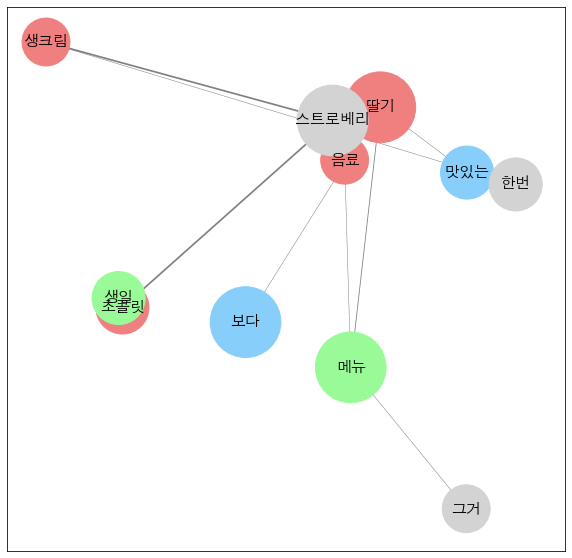

In [25]:
import pickle
import re

ProjDic = pd.read_csv("(R)Project Dictionary(표준형).csv", encoding = "cp949").fillna(0)
freq_list = list(filter(lambda x : "pickle" in x, os.listdir(str(os.getcwd()))))
freq_list = sorted(list(filter(lambda x : "(freq)" in x, freq_list)))
DOM_list = sorted(list(filter(lambda x : "(RM)" in x, os.listdir(str(os.getcwd())))))

for iteration in range(len(freq_list)):
    with open(freq_list[iteration],"rb") as fr:
        freq = pickle.load(fr)
    with open(DOM_list[iteration],"rb") as fr:
        DOM = pickle.load(fr)    
        
    def Replace_Texts_in_Dictionary(Project_dic, Frequency_output):
        Rep_list = list(set(list(Project_dic.loc[Project_dic["Replace_Texts"]!=0,"Replace_Texts"].to_dict().values())))
        for standard_word in Rep_list:
            word_list = list(set(list(Project_dic.loc[Project_dic["Replace_Texts"]==standard_word, "tag"].to_dict().values())))
            for word in word_list:
                if word in list(Frequency_output.tag):
                    if standard_word in list(Frequency_output.tag):
                        replace_count = int(list(Frequency_output.loc[Frequency_output["tag"] == word, "count"])[0])
                        cum_count = int(list(Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"])[0])
                        Frequency_output.loc[Frequency_output["tag"] == standard_word, "count"] = replace_count + cum_count
                        Frequency_output = Frequency_output.loc[Frequency_output["tag"] != word]
                    else:
                        Frequency_output.loc[Frequency_output["tag"] == word, "tag"] = standard_word
                else: continue

        return Frequency_output.sort_values(by = "count", ascending = False)

        
    Replaced_Freq = Replace_Texts_in_Dictionary(ProjDic, freq)
    
    stopwords = ["rt","gt","","오늘","어제","내일","진짜", "와서", 0, "amp",
            "ㅋㅋㅋㅋㅋ", "ㅋㅋ","ㅋㅋㅋ","ㅋㅋㅋㅋ", "좋다", "너무", "그냥", "정말",
            "역시", "계속", "바로", "있다", "in","1분께", "플레이스"]
    if "스타벅스" in freq_list[iteration]:
        stopwords += ["스타벅스","스벅","스벅에","스타벅스에","스타벅스에서","스벅에서","스타벅스가"]
    elif "투썸" in freq_list[iteration]:
        stopwords += ["투썸플레이스"]
    elif "탐탐" in freq_list[iteration]:
        stopwords += ["탐앤탐스"]
    elif "이디야" in freq_list[iteration]:
        stopwords += ["이디야"]
    elif "엔젤리너스" in freq_list[iteration]:
        stopwords += ["엔젤리너스"]
        
    asd = Replaced_Freq["tag"].isin(stopwords)
    asdasd = Replaced_Freq[~asd]
    
        
    Freq_10_tag = list(asdasd[asdasd["count"]>=10].tag)
    Cooc_Table = pd.DataFrame(columns = Freq_10_tag)
    
    for tag in Freq_10_tag:
        tag = str(tag)
        tag_count = []
        Message_including_tag = list(filter(lambda x : tag in str(x), list(DOM.contents)))

        for item in Freq_10_tag:
            tag_finder = re.compile(str(item))
            tag_count += [len(list(filter(lambda x : len(tag_finder.findall(str(x)))>0, Message_including_tag)))]
        Cooc_Table.loc[len(Cooc_Table)] = tag_count

    CoTable = Cooc_Table[Cooc_Table.columns]

    for i in range(len(Cooc_Table)):
        CoTable.loc[i] = [0]*(i+1) + list(CoTable.loc[i])[i+1:]
    CoTable.index = Cooc_Table.columns
    
    CoTable_stacked = CoTable.stack().reset_index()
    CoTable_stacked.rename(columns = {'level_0' : 'tag_1', 'level_1' : 'tag_2', 0:'cooccurence_count'}, inplace = True)
    CoTable_stacked.sort_values(by = 'cooccurence_count', ascending = False, inplace = True)
    CoTable_stacked = CoTable_stacked[CoTable_stacked["cooccurence_count"]>0]
    CoTable_stacked.reset_index(drop = True, inplace = True)
    
    
    tag_1_type = list(map(lambda x: list(ProjDic.loc[ProjDic["tag"]==x, "type"])[0] if x in list(ProjDic.tag) else "" ,list(CoTable_stacked.tag_1)))
    tag_2_type = list(map(lambda x: list(ProjDic.loc[ProjDic["tag"]==x, "type"])[0] if x in list(ProjDic.tag) else "" ,list(CoTable_stacked.tag_2)))
    CoTable_stacked["tag_1_type"] = tag_1_type
    CoTable_stacked["tag_2_type"] = tag_2_type
    #아직 카테고라이징 안된 것들 제외하고 합시다.
    #CoTable_stacked = CoTable_stacked[CoTable_stacked["tag_1_type"]!= ""]
    #CoTable_stacked = CoTable_stacked[CoTable_stacked["tag_2_type"]!= ""]

    def type_compare(DataFrame):
        if DataFrame["tag_1_type"] != DataFrame["tag_2_type"]:
            return "T"
    CoTable_stacked["type_comparison"] = CoTable_stacked.apply(type_compare, axis=1)
    
    import glob
    import pickle

    CoTable_stacked_H =  CoTable_stacked[CoTable_stacked["type_comparison"]=="T"]
    CoTable_stacked_H = CoTable_stacked_H[CoTable_stacked_H["cooccurence_count"]>=5] 
    CoTable_stacked_H_tag = list(set(list(CoTable_stacked_H.tag_1)+list(CoTable_stacked_H.tag_2)))

    Freq_10_tag_dict = {}
    for i in range(len(Freq_10_tag)):
        Freq_10_tag_dict[Freq_10_tag[i]] = {"type" : list(Dic.loc[Dic["tag"]==Freq_10_tag[i], "type"])[0] if list(Dic.loc[Dic["tag"]==Freq_10_tag[i], "type"])!=[] else ""}


    DF = pd.DataFrame(columns = ["tag_A","tag_B","tag_C","AB_count","BC_count","tag_A_type","tag_B_type","tag_C_type"])
    from itertools import combinations
    for tag_A, tag_B, tag_C in (combinations(CoTable_stacked_H_tag,3)):
        #print(tag_A, tag_B, tag_C)
        if Freq_10_tag_dict[tag_A]["type"] != Freq_10_tag_dict[tag_B]["type"]:
            mask_1 = (CoTable_stacked_H["tag_1"]==tag_A)&(CoTable_stacked_H["tag_2"]==tag_B)
            mask_2 = (CoTable_stacked_H["tag_1"]==tag_B)&(CoTable_stacked_H["tag_2"]==tag_A)
            mask_1_df = CoTable_stacked_H.loc[mask_1,["tag_1","tag_2","cooccurence_count"]]
            mask_2_df = CoTable_stacked_H.loc[mask_2,["tag_1","tag_2","cooccurence_count"]]
            asdasdasd = pd.concat([mask_1_df,mask_2_df])
            if len(asdasdasd) > 0:
                if Freq_10_tag_dict[tag_B]["type"] != Freq_10_tag_dict[tag_C]["type"]:
                    mask_3 = (CoTable_stacked_H["tag_1"]==tag_B)&(CoTable_stacked_H["tag_2"]==tag_C)
                    mask_4 = (CoTable_stacked_H["tag_1"]==tag_C)&(CoTable_stacked_H["tag_2"]==tag_B)
                    mask_3_df = CoTable_stacked_H.loc[mask_3,["tag_1","tag_2","cooccurence_count"]]
                    mask_4_df = CoTable_stacked_H.loc[mask_4,["tag_1","tag_2","cooccurence_count"]]
                    dsadsadsa = pd.concat([mask_3_df,mask_4_df])
                    if len(dsadsadsa) > 0:
                        info = [tag_A, tag_B, tag_C,
                            asdasdasd["cooccurence_count"].iloc[0], dsadsadsa["cooccurence_count"].iloc[0],
                            Freq_10_tag_dict[tag_A]["type"],Freq_10_tag_dict[tag_B]["type"],Freq_10_tag_dict[tag_C]["type"]]

                        DF.loc[len(DF)] = info
                    else: continue
                else: continue
            else: continue
        else: continue

    DF["rivalry"] = DF["AB_count"]/DF["BC_count"]
    DF["complementary"] = DF["AB_count"]*DF["BC_count"]/sum(list(CoTable_stacked_H.cooccurence_count))
    DF = DF.sort_values(by = ["rivalry","complementary"], ascending = False)
    DF.to_excel(freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"연결강도.xlsx", index = False)
    

    Hetero_CoTable = CoTable_stacked[CoTable_stacked["type_comparison"] == "T"]
    Hetero_CoTable = Hetero_CoTable[["tag_1","tag_2", "cooccurence_count"]].reset_index(drop = True)
    
    
    
    
    
    
    #중복 허용 안함

    Hetero_CoTable = Hetero_CoTable.loc[Hetero_CoTable["cooccurence_count"]>=5] 
    #최소빈도를 일단 5으로 설정했는데.. 하면 할수록 수치로 접근하는게 아니라 비율로 접근하는게 좋을 것 같다.
    ##print(len(Hetero_CoTable))  #<-- 시험프린트용

    #기존에 저장되어있던 "cluster"들을 초기화 해준다.
    all = [var for var in globals() if "cluster" in var]
    for var in all:
        del globals()[var]

    import re
    for i in range(len(Hetero_CoTable)):   # Hetero_CoTable 길이만큼 반복
        listified_row = [list(Hetero_CoTable.iloc[i])]    # 각 row의 데이터를 list화한다. listified_row의 구조는 이중 리스트이다. [[]]
        # [["제주", "제주도", 378]]와 같은 format이다.
        #print(listified_row)
        if i == 0:   #test_Hetero의 첫 row 데이터의 경우, seed_pair이므로 먼저 cluster_1임을 지정해준다.
            cluster_1 = listified_row    # 첫 listified_row는 cluster_1으로 정한다.
            for element in cluster_1:
                cluster_1_set = element[0:2]   # tag들만을 중복없이 저장하기 위해 pair만 가져오고 빈도는 안가져온다.  
                                               # 이 작업은 freqency_and_link_count_df를 만드는 과정이다.
            cluster_1_set = list(set(cluster_1_set))  # tag간 중복을 없애기 위해 set화 한다.
            cluster_num = 1              # cluster의 개수를 저장할 변수를 선언한다.

        else :  #두번째 열 데이터부터는 다음의 작업을 따른다.
            # listified_row에 있는 tag들이 다른 cluster에 있을지 찾아주는 finder정규식을 만들어준다. listified_row[0]인 이유는 이중리스트였기 때문이다.
            tags_finder = re.compile(str(listified_row[0][:2]).replace(",","|").replace("'","").replace(" ","")[1:-1])
            # 만약 tag_finder의 결과가 []인 경우 --> 공통분모가 없다는 이야기 --> 새로운 cluster 생성
            # 만약 tag_finder의 결과가 []가 아닌경우 --> 공통분모가 있는 cluster에 추가.
            # 다만 이는 중복을 허용하지 않는 경우이기에 공통분모가 있더라도 더 연관성이 큰 cluster에 붙어야한다.

            added = 0
            potential_clusters = []  # pair와 공통분모를 가지는 cluster를 담을 potential_cluster리스트를 선언한다.
            for number in range(cluster_num): #군집의 개수만큼 다음의 작업을 반복한다
                # 중복을 허용하지 않는 태그들만의 리스트인 cluster_n_set에 tag_finder로 tag가 존재하는지(==공통분모가 있는지) 찾아준다.
                if tags_finder.findall(str(globals()["cluster_"+str(number+1)+"_set"])) != [] :  #공통분모가 있다면
                    potential_clusters.append("cluster_"+str(number+1))  #potential_cluster에 잠재적인 cluster들의 이름(번호까지)을 추가한다.


            #print(potential_clusters)
            if potential_clusters == [] : #공통분모가 없다면
                if number == cluster_num-1 and added == 0 : #마지막 반복이고 아무 cluster도 listified_row의 태그를 가지지 않는다면
                    globals()["cluster_"+str(cluster_num+1)] = listified_row   #새로운 cluster 리스트 생성
                    globals()["cluster_"+str(cluster_num+1)+"_set"] = list(set(listified_row[0][:2])) #새로운 cluster_set 생성.
                    cluster_num += 1
                    #print("새로운 cluster 생성 후 넘어갑니다")
                    #print("---------------------------------")
                continue

            # 중복을 허용하지 않는 알고리즘을 넣어야 한다.
            # 중복을 허용하지 않되, listified_row[0][0:2] (==pair)가 여러 cluster의 잠재요소라면, 
            # 그 pair가 cluster에 추가될 경우 , 그  pair의 구성요소를 가진 가장 (가까운/먼) pair를 찾고,
            # 일단 먼 것으로 한다.
            # (pair의 구성요소가 2개이니 결과도 2개일 것이므로) 더 큰 빈도값을 가지는 것을 대표값으로 지정한다.
            # 위 과정을 잠재 cluster에 모두 적용하고, 각 cluster마다 계산된 대표값을 비교해 가장 큰 쪽에 pair를 할당한다.
            # 빈도가 큰쪽에 할당하는 이유는 그 pair의 구성요소에 대해 그 만큼 더 언급했고, 이는 해당 cluster가 그 pair를 더 잘 대표한다고 볼 수 있기 때문이다.
            # pair_element_1, pair_element_2 에 listified_row의 tag들을 넣어준다.
            pair_element_1, pair_element_2 =  listified_row[0][0], listified_row[0][1]
            #print(pair_element_1)
            #print(pair_element_2)

            representatives = []  # 대표값들을 넣어줄 리스트를 생성한다
            for cluster_n in potential_clusters: # 찾아놓은 potential_cluster의 개수만큼 다음의 작업을 실행한다
                # pair_element_1_count, pair_element_2_count 에 각 cluster에서 pair_element_n이 있는 원소의 3번째 값(빈도)를 추출해, 그 중 최대값을 가져온다. 
                pair_element_1_count = max(list(map(lambda x: int(x[2]) if pair_element_1 in x else 0, globals()[cluster_n])))
                pair_element_2_count = max(list(map(lambda x: int(x[2]) if pair_element_2 in x else 0, globals()[cluster_n])))
                # pair_element_1_count, pair_element_2_count 중 큰 값을 해당 cluster의 대표값으로 설정해 rep_count라는 리스트에 차례대로 넣어준다.
                if pair_element_1_count >= pair_element_2_count : #같을 경우 어디 붙어도 큰 상관 없음
                    rep_count = pair_element_1_count
                else:
                    rep_count = pair_element_2_count
                representatives.append(rep_count)
            #print(representatives)

            # cluster중 대표값이 가장 큰 것이 pair에 더 연관성이 있다고 보는 방식이다.
            max_rep = max(representatives)    #현재 representatives 리스트중 최대값을 max_rep이라는 변수에 고정해준다.     
            order = []  #order이라는 리스트는 max_rep 가 있는 인덱스를 추출하기 위한 리스트이다. 이 인덱스들을 통해 potential_clusters 중 어느 cluster에 pair를 할당할지 정하는 것이다.
            for r in range(len(representatives)):    
                if max_rep in representatives:
                    order.append(representatives.index(max_rep))
                    representatives[representatives.index(max_rep)] = ""


            for numb in order:
                globals()[potential_clusters[numb]] += listified_row
                #print( str(listified_row)+"는 "+str(potential_clusters[numb])+"에 할당됨")
                globals()[potential_clusters[numb]+"_set"] += listified_row[0][:2]   # listified_row의 태그들을 cluster_n_set에 추가
                globals()[potential_clusters[numb]+"_set"] = list(set(globals()[potential_clusters[numb]+"_set"])) # cluster_set를 중복없이 set화 해준다
                #print("할당된 cluster의 세트는" + str(globals()[potential_clusters[numb]+"_set"]) +"입니다.")
            added += 1



            #print("---------------------------------")

    clusters = []   # clusters라는 리스트에 cluster_n(listified_row를 담은 군집)을 넣어준다.
    for var in globals():
        if "cluster_" in var:
            if "set" not in var:
                if "num" not in var:
                    if "_n" not in var:
                        clusters.append(var)



    cluster_sets = []   #중복을 허용하지 않는 tag들만의 list인 cluster_n_set을 cluster_sets라는 리스트에 넣어준다.
    for var in globals():
        if "cluster_" in var:
            if "set" in var:
                if "sets" not in var:
                    cluster_sets.append(var)

    #Clustered라는 새로운 데이터프레임을 만들어준다. --> 이는 clustered_subject.csv라는 파일로 export될 운명이다.
    Clustered = pd.DataFrame(columns = ["tag_1","tag_2","cooccur_count","cluster_no"])
    for cluster in clusters: # cluster_n의 개수 만큼 다음 작업을 반복한다
        for cooccurence in globals()[cluster]:  #cluster_n속 원소(pair)의 개수만큼 다음 작업을 반복한다.
            # 원소 (["제주", "제주도", 378] 의 형태) 옆에 cluster번호 ([1] 의 형태)를 더해 Clustered에 수직을 stack한다.
            Clustered.loc[len(Clustered)] = cooccurence + [int(cluster.split("_")[-1])]


    #freqency_and_link_count_df라는 새로운 데이터프레임을 만들어 준다. --> 이는 어떤 cluster에서 각 tag별로 몇개의 link로 연결 되었고, cooccurence가 몇번 일어났는지 알려준다.
    freqency_and_link_count_df = pd.DataFrame(columns = ["tag","link_count", "cooccur_count", "cluster"])
    for i in range(len(cluster_sets)):  # cluster_n_set의 개수만큼 다음의 작업을 반복한다
        freqency_and_link_count = []
        for word in globals()[cluster_sets[i]]:  # cluster_n_set의 tag마다

            # word가 Clustered의 tag_1이나 tag_2에 있으면
            if word in (list(Clustered[Clustered["cluster_no"] == i+1].tag_1) + list(Clustered[Clustered["cluster_no"] == i+1].tag_2)):
                # 태그의 링크수 구하는 tag_link_count
                tag_link_count = len(list(filter(lambda x: word in x, list(Clustered[Clustered["cluster_no"] == i+1].tag_1) + list(Clustered[Clustered["cluster_no"] == i+1].tag_2))))
                # 태그의 cooccurence 빈도를 나타내는 tag_frequency_count
                tag_frequency_count = sum(list(Clustered[Clustered["cluster_no"]== i+1].loc[
                    Clustered[Clustered["cluster_no"]== i+1]["tag_1"] == word, "cooccur_count"]) 
                    + list(Clustered[Clustered["cluster_no"]== i+1].loc[
                    Clustered[Clustered["cluster_no"]== i+1]["tag_2"] == word, "cooccur_count"]))


                #freqency_and_link_count_df에 tag, tag_link_count, tag_frequency_count, cluster number순서로 차곡히 쌓아준다.
                freqency_and_link_count_df.loc[len(freqency_and_link_count_df)] = word, tag_link_count, tag_frequency_count ,i+1
    #freqency_and_link_count_df를 먼저 cluster number 순서로 정렬하고 cooccurence 빈도 순으로 (내림차순) 정렬한다.
    freqency_and_link_count_df.sort_values(by=["cluster","cooccur_count"],ascending = [True,False],inplace=True) 

    #export 한다.
    #Clustered_2.to_csv("clustered_"+file.split("_")[-1].split(".")[0]+"(Not_Overlapped).csv", encoding = "cp949", index = False)
    #freqency_and_link_count_df.to_csv("freqNlink_"+file.split("_")[-1].split(".")[0]+"(Not_Overlapped).csv", encoding = "cp949",  index = False)
    Clustered.to_csv("clustered_"+freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"(Not_Overlapped).csv", encoding = "cp949", index = False)
    freqency_and_link_count_df.to_csv("freqNlink_"+freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"(Not_Overlapped).csv", encoding = "cp949",  index = False)
    #display(Clustered)

    #display(freqency_and_link_count_df)




    import matplotlib.pyplot as plt
    import networkx as nx

    coo = Clustered
    fNl = freqency_and_link_count_df
    
    fNl["type"] = list(map(lambda x: list(ProjDic.loc[ProjDic["tag"]== x ,"type"])[0] if x in list(ProjDic.tag) else "", list(fNl.tag)))
    
    Type_Object = []
    # Type_Attitude = [] --> 추후에 stance라는 type유형을 넣는다면 하자
    Type_Action = [] 
    Type_Extra = []
    Type_Uncategorized = []

    def distribute_type(item):
        item_type = list(fNl.loc[fNl["tag"]==item, "type"])[0]
        if item_type == "p" or item_type == "b" or item_type == "l" or item_type == "h":
            Type_Object.append(item)
        elif item_type == "a" or item_type == "d":
            Type_Action.append(item)
        elif item_type == "t" or item_type == "o" or item_type == "x":
            Type_Extra.append(item)
        else:
            Type_Uncategorized.append(item)

    fNl.tag.apply(distribute_type)
    
    tag_1_type = list(map(lambda x: "type_object" if x in Type_Object else "type_action" if x in Type_Action else "type_extra" if x in Type_Extra else "type_uncategorized" ,list(coo.tag_1)))
    tag_2_type = list(map(lambda x: "type_object" if x in Type_Object else "type_action" if x in Type_Action else "type_extra" if x in Type_Extra else "type_uncategorized" ,list(coo.tag_2)))
    coo["tag_1_type"] = tag_1_type
    coo["tag_2_type"] = tag_2_type
    
    def type_compare(DataFrame):
        if DataFrame["tag_1_type"] != DataFrame["tag_2_type"]:
            return "T"
    coo["type_comparison"] = coo.apply(type_compare, axis=1)

    multi_mode_Full_table = coo[coo["type_comparison"]=="T"]
    display(coo)
    display(multi_mode_Full_table)
    
    # 클러스터 전체를 한번에 그리기
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize = (10,10))

    import matplotlib
    import matplotlib.font_manager as fm
    font_location = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
    font_name = fm.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family = font_name)
    matplotlib.rcParams['axes.unicode_minus']=False

    Graph_Toursite = nx.Graph()
    Entire_relations = []
    Entire_Nodes = []

    for i,*arg in multi_mode_Full_table.itertuples():
        Entire_relations.append(tuple([arg[0],arg[1],{'weight' : arg[2]}]))
    for i,*arg in fNl.itertuples():
        Entire_Nodes.append(tuple([arg[0], {'weight' : arg[2]}]))
    Graph_Toursite.add_nodes_from(Entire_Nodes)
    Graph_Toursite.add_edges_from(Entire_relations)
    
    print(Entire_relations)
    

    pos = nx.random_layout(Graph_Toursite)
    nx.draw_networkx_nodes(
        Graph_Toursite, pos, node_color = 'lightskyblue', nodelist = Type_Action,
        node_size = [n[1]['weight']/max(list(fNl.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
        )
    nx.draw_networkx_nodes(
        Graph_Toursite, pos, node_color = 'lightcoral', nodelist = Type_Object,
        node_size = [n[1]['weight']/max(list(fNl.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
        )
    nx.draw_networkx_nodes(
        Graph_Toursite, pos, node_color = 'palegreen', nodelist = Type_Extra,
        node_size = [n[1]['weight']/max(list(fNl.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
        )
    nx.draw_networkx_nodes(
        Graph_Toursite, pos, node_color = 'lightgray', nodelist = Type_Uncategorized,
        node_size = [n[1]['weight']/max(list(fNl.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
        )

    nx.draw_networkx_edges(
        Graph_Toursite, pos, edge_color = 'grey',
        width = [e[2]['weight']/10 for e in Graph_Toursite.edges(data=True)]
        )

    nx.draw_networkx_labels(
        Graph_Toursite, pos, font_size=15, font_family =font_name, font_weight = 'bold'
        )

    #plt.axis("off")
    #plt.show()
    plt.savefig(freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"_network.png")

    eigen_df = pd.DataFrame(columns = ["tag","eigenvector_centrality"])
    for i, elem in zip(list(nx.eigenvector_centrality(Graph_Toursite).keys()),list(nx.eigenvector_centrality(Graph_Toursite).values())):
        eigen_df.loc[len(eigen_df)] = i, elem
    eigen_df = eigen_df.sort_values(by="eigenvector_centrality", ascending = False).reset_index(drop=True)
    #display(eigen_df)

    degree_df = pd.DataFrame(columns = ["tag","degree_centrality"])
    for i, elem in zip(list(nx.degree_centrality(Graph_Toursite).keys()),list(nx.degree_centrality(Graph_Toursite).values())):
        degree_df.loc[len(degree_df)] = i, elem
    degree_df = degree_df.sort_values(by="degree_centrality", ascending = False).reset_index(drop=True)
    #display(degree_df)

    closeness_df = pd.DataFrame(columns = ["tag","closeness_centrality"])
    for i, elem in zip(list(nx.closeness_centrality(Graph_Toursite).keys()),list(nx.closeness_centrality(Graph_Toursite).values())):
        closeness_df.loc[len(closeness_df)] = i, elem
    closeness_df = closeness_df.sort_values(by="closeness_centrality", ascending = False).reset_index(drop=True)
    #display(closeness_df)

    betweenness_df = pd.DataFrame(columns = ["tag","betweenness_centrality"])
    for i, elem in zip(list(nx.betweenness_centrality(Graph_Toursite).keys()),list(nx.betweenness_centrality(Graph_Toursite).values())):
        betweenness_df.loc[len(betweenness_df)] = i, elem
    betweenness_df = betweenness_df.sort_values(by="betweenness_centrality", ascending = False).reset_index(drop=True)
    #display(betweenness_df)

    centrality_df = pd.concat([eigen_df,degree_df,closeness_df,betweenness_df], axis = 1)
    #centrality_df.to_csv(sorted(clustered)[t].split("(")[0].split("_")[-1]+"_cluster_"+str(cluster_no+1)+"_centrality.csv", encoding = "cp949", index=False)
    #centrality_df.to_excel(sorted(clustered)[t].split("(")[0].split("_")[-1]+"_cluster_"+str(cluster_no+1)+"_centrality.xlsx", encoding = "cp949", index=False)
    centrality_df.to_excel(freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"_centrality.xlsx", encoding = "cp949", index=False)





    # 클러스터 별로 그리기
    for cluster_no in range(len(list(set(list(coo.cluster_no))))):
        coo_seg = coo.loc[coo["cluster_no"]== cluster_no + 1]
        fNl_seg = fNl.loc[fNl["cluster"]== cluster_no + 1]

        fNl_seg["type"] = list(map(lambda x: list(ProjDic.loc[ProjDic["tag"]== x ,"type"])[0] if x in list(ProjDic.tag) else "", list(fNl_seg.tag)))
        
        Type_Object = []
        # Type_Attitude = [] --> 추후에 stance라는 type유형을 넣는다면 하자
        Type_Action = [] 
        Type_Extra = []
        Type_Uncategorized = []

        def distribute_type(item):
            item_type = list(fNl_seg.loc[fNl_seg["tag"]==item, "type"])[0]
            if item_type == "p" or item_type == "b" or item_type == "l" or item_type == "h":
                Type_Object.append(item)
            elif item_type == "a" or item_type == "d":
                Type_Action.append(item)
            elif item_type == "t" or item_type == "o" or item_type == "x":
                Type_Extra.append(item)
            else:
                Type_Uncategorized.append(item)

        fNl_seg.tag.apply(distribute_type)
        
        tag_1_type = list(map(lambda x: "type_object" if x in Type_Object else "type_action" if x in Type_Action else "type_extra" if x in Type_Extra else "type_uncategorized" ,list(coo_seg.tag_1)))
        tag_2_type = list(map(lambda x: "type_object" if x in Type_Object else "type_action" if x in Type_Action else "type_extra" if x in Type_Extra else "type_uncategorized" ,list(coo_seg.tag_2)))
        coo_seg["tag_1_type"] = tag_1_type
        coo_seg["tag_2_type"] = tag_2_type
        
        def type_compare(DataFrame):
            if DataFrame["tag_1_type"] != DataFrame["tag_2_type"]:
                return "T"
        coo_seg["type_comparison"] = coo_seg.apply(type_compare, axis=1)

        multi_mode_table = coo_seg[coo_seg["type_comparison"]=="T"]

        %matplotlib inline
        plt.figure(figsize = (10,10))
        font_location = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
        font_name = fm.FontProperties(fname=font_location).get_name()
        matplotlib.rc('font', family = font_name)
        matplotlib.rcParams['axes.unicode_minus']=False

        Graph_Toursite = nx.Graph()
        relations = []
        Nodes = []

        for i,*arg in multi_mode_table.itertuples():
            relations.append(tuple([arg[0],arg[1],{'weight' : arg[2]}]))
        for i,*arg in fNl_seg.itertuples():
            Nodes.append(tuple([arg[0], {'weight' : arg[2]}]))
        Graph_Toursite.add_nodes_from(Nodes)
        Graph_Toursite.add_edges_from(relations)

        pos = nx.random_layout(Graph_Toursite)
        nx.draw_networkx_nodes(
            Graph_Toursite, pos, node_color = 'lightskyblue', nodelist = Type_Action,
            node_size = [n[1]['weight']/max(list(fNl_seg.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
            )
        nx.draw_networkx_nodes(
            Graph_Toursite, pos, node_color = 'lightcoral', nodelist = Type_Object,
            node_size = [n[1]['weight']/max(list(fNl_seg.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
            )
        nx.draw_networkx_nodes(
            Graph_Toursite, pos, node_color = 'palegreen', nodelist = Type_Extra,
            node_size = [n[1]['weight']/max(list(fNl_seg.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
            )
        nx.draw_networkx_nodes(
            Graph_Toursite, pos, node_color = 'lightgray', nodelist = Type_Uncategorized,
            node_size = [n[1]['weight']/max(list(fNl_seg.cooccur_count))*5000 for n in Graph_Toursite.nodes(data=True)]
            )

        nx.draw_networkx_edges(
            Graph_Toursite, pos, edge_color = 'grey', 
            width = [e[2]['weight']/10 for e in Graph_Toursite.edges(data=True)]
            )

        nx.draw_networkx_labels(
            Graph_Toursite, pos, font_size=15, font_family =font_name, font_weight = 'bold'
            )


        #plt.axis("off")
        #plt.show()
        #plt.savefig(sorted(clustered)[t].split("(")[0].split("_")[-1]+"_cluster_"+str(cluster_no+1)+".png")
        plt.savefig(freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"_cluster_"+str(cluster_no+1)+".png")


        eigen_df = pd.DataFrame(columns = ["tag","eigenvector_centrality"])
        for i, elem in zip(list(nx.eigenvector_centrality(Graph_Toursite).keys()),list(nx.eigenvector_centrality(Graph_Toursite).values())):
            eigen_df.loc[len(eigen_df)] = i, elem
        eigen_df = eigen_df.sort_values(by="eigenvector_centrality", ascending = False).reset_index(drop=True)
        #display(eigen_df)

        degree_df = pd.DataFrame(columns = ["tag","degree_centrality"])
        for i, elem in zip(list(nx.degree_centrality(Graph_Toursite).keys()),list(nx.degree_centrality(Graph_Toursite).values())):
            degree_df.loc[len(degree_df)] = i, elem
        degree_df = degree_df.sort_values(by="degree_centrality", ascending = False).reset_index(drop=True)
        #display(degree_df)

        closeness_df = pd.DataFrame(columns = ["tag","closeness_centrality"])
        for i, elem in zip(list(nx.closeness_centrality(Graph_Toursite).keys()),list(nx.closeness_centrality(Graph_Toursite).values())):
            closeness_df.loc[len(closeness_df)] = i, elem
        closeness_df = closeness_df.sort_values(by="closeness_centrality", ascending = False).reset_index(drop=True)
        #display(closeness_df)

        betweenness_df = pd.DataFrame(columns = ["tag","betweenness_centrality"])
        for i, elem in zip(list(nx.betweenness_centrality(Graph_Toursite).keys()),list(nx.betweenness_centrality(Graph_Toursite).values())):
            betweenness_df.loc[len(betweenness_df)] = i, elem
        betweenness_df = betweenness_df.sort_values(by="betweenness_centrality", ascending = False).reset_index(drop=True)
        #display(betweenness_df)

        centrality_df = pd.concat([eigen_df,degree_df,closeness_df,betweenness_df], axis = 1)
        #centrality_df.to_csv(sorted(clustered)[t].split("(")[0].split("_")[-1]+"_cluster_"+str(cluster_no+1)+"_centrality.csv", encoding = "cp949", index=False)
        #centrality_df.to_excel(sorted(clustered)[t].split("(")[0].split("_")[-1]+"_cluster_"+str(cluster_no+1)+"_centrality.xlsx", encoding = "cp949", index=False)
        centrality_df.to_excel(freq_list[iteration].split("(freq)")[-1].split(".pickle")[0]+"_cluster_"+str(cluster_no+1)+"_centrality.xlsx", encoding = "cp949", index=False)
        #centrality_df









In [192]:
Replaced_Freq["count"].quantile(q=0.3, interpolation='nearest')




6.0

In [193]:
Hetero_Table

NameError: name 'Hetero_Table' is not defined

In [3]:
with open(file_list[0],"rb") as fr:
    df = pickle.load(fr)
df

,contents,date
0,이거 먹는 내내 투썸케잌 생각났다. 제발 투썸케잌 한번만 먹어보고싶다.,2018-03-01
1,여기 가봤는데!!투썸 다른점포들이랑 약간 다른 쇼파쓰더라 짱 푹신했엉,2018-03-01
2,광복동 투썸이 없어지면서 울면서 다니는 내 단골ㅠ0ㅠ 갈 때마다 등산하는 기분이야...,2018-03-01
3,동네 투썸 왔는데 키즈카페 온 줄~~~\n아가들 많구나~~~\n인형 가지고 노는 아...,2018-03-01
4,아 서점이랑 투썸 완전 반대방학이고 좀 많이 걷는데 가까운 카페베네를 갈까 투썸을 ...,2018-03-01
...,...,...
15,내일부터 스벅이랑 ㅂㅌ 콜라보 때문에 전국 매장에 ㅂㅌ 노래 나온다네요 다들 투썸 ...,2020-01-20
16,투썸딸기케익줫같이만드네...,2020-01-20
17,내기분을 이해할 수 있는건 투썸 케이크밖에없다,2020-01-20
18,"투썸플레이스, 설날맞이 풍성한 프로모션 진행",2020-01-20
